# Neural Networks on Image Dataset

In this notebook, we tackle a simple image classification dataset from sklearn: the digits dataset (handwritten digits images). For this exercise, we need the `torchvision` library. To install it, simply use the following installation command,

```shell
pip install torchvision
```

## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs.
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

In [1]:
import random
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # pip install seaborn
import torch
import torchvision
from sklearn.datasets import load_digits

print(torchvision.__version__)

0.21.0+cpu


Set the seed for PRNG and determinism.

In [2]:
seed = 73
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Define the function for plotting a given set of images.

In [3]:
plt.rcParams["savefig.bbox"] = "tight"
sns.set_style("darkgrid")


def show(images: List) -> None:
    _, axs = plt.subplots(ncols=len(images), squeeze=False)
    for index, image in enumerate(images):
        image = image.detach()
        axs[0, index].imshow(np.asarray(image), cmap="gray")
        axs[0, index].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Load the digits dataset which consists of the features $X$ and labels $y$,

In [4]:
images, labels = load_digits(return_X_y=True)

Check the shape of the images and labels.

In [5]:
images.shape, labels.shape

((1797, 64), (1797,))

Check samples of the images and labels.

In [6]:
print(images[:2])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


In [7]:
print(labels[:2])

[0 1]


From here, we can see that there are 1,797 instances of images and labels. However, we can see that each "image" has 1x64 vectors.

Meanwhile, an image is supposed to have a width x length.

In [8]:
# to do: reshape the `images` tensor to be of `num_instances x width x length` shape
images = images.reshape(-1,8,8)

Retrieve the only first 5 images for plotting.

In [9]:
# to do: retrieve the first 5 images
tensor = torch.tensor(images[:5]).unsqueeze(1).reshape(5,8,8)
image_grid = torchvision.utils.make_grid(tensor,nrow=5,pad_value=1)

Check that we got the first 5 items and that the images have been properly reshaped. It should have a shape of 5x8x8

In [10]:
image_grid.shape

torch.Size([5, 8, 8])

Each image having a shape of 8x8

In [11]:
image_grid[0].shape

torch.Size([8, 8])

Plot the images

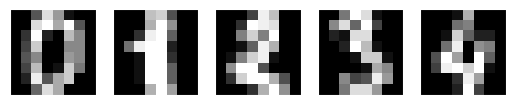

In [12]:
show(image_grid)

Confirm the labels of the images

In [13]:
# to do: print the labels
print(labels[:5])

[0 1 2 3 4]


## Dataset Preparation

We split the images and labels to training/validation/test sets. The splitting is as follows,

* Training: 80%
* Test: 20%

Then we get the 20% of the training set as the validation set, leaving us with the following,

* Training: 64%
* Validation: 16%
* Test: 20%

Recall that we reshaped our images to be of $num\_instances \times width \times length$ shape.

So, we have to reshape it back to $num\_instances \times dimensions$ before splitting them.

In [14]:
from sklearn.model_selection import train_test_split

images = images.reshape(images.shape[0], -1)

train_features, test_features, train_labels, test_labels = train_test_split(
    images, labels, test_size=2e-1, stratify=labels, shuffle=True, random_state=seed
)

train_features, validation_features, train_labels, validation_labels = train_test_split(
    train_features,
    train_labels,
    test_size=2e-1,
    stratify=train_labels,
    shuffle=True,
    random_state=seed,
)

Confirm the dataset sizes

In [15]:
# to do: print the dataset sizes
print(f"Dataset sizes:")
print(
    #we get the actual count of elements in our train featurses, validation features and in our test set
    f"\tTraining: {len(train_features)}, Validation: {len(validation_features)}, Test: {len(test_features)}"
)

Dataset sizes:
	Training: 1149, Validation: 288, Test: 360


<span style="color:red;">**Question 6-19:** How many instances are there in the training, validation, and test sets respectively?</span>

**Answer**: Training = 1149
Validation = 288
Test set = 360

After splitting the dataset into training/validation/test sets, we can now pack them into PyTorch tensor objects.

In [16]:
train_features = torch.from_numpy(train_features).float()
train_labels = torch.from_numpy(train_labels)

# to do: pack the validation and test data into torch tensors.
validation_features = torch.tensor(validation_features, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels)

test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels)

For these data to be ingestible for our model, we have to pack them into a [TensorDataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset) objects.

In [17]:
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)

# to do: pack the validation and test features and labels into a TensorDataset
validation_dataset = torch.utils.data.TensorDataset(validation_features, validation_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)

To automate the batching of the datasets during training, we pack them into [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) objects.

In [18]:
# define the batch size
batch_size = 100

import multiprocessing

# to do: pack the datasets into data loaders
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    num_workers=multiprocessing.cpu_count(),
    pin_memory=True,
    shuffle=True,
)

validation_loader = torch.utils.data.DataLoader(
    dataset=validation_dataset,
    batch_size=len(validation_dataset),
    num_workers=multiprocessing.cpu_count(),
    pin_memory=True,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=len(test_dataset),
)

## Image Classifier (baseline)

Implement an image classifier neural network with the following specifications,

* 2 layers with each layer having 500 neurons each
* Each hidden layer will use logistic/sigmoid function as its activation function
* Use SGD as the optimization algorithm with learning rate $1 \times 10^{-3}$

Train for 50 epochs with mini-batch size 100. This will serve as our baseline model, which uses logistic/sigmoid function to learn the nonlinear relationships in our data.

In [19]:
class ClassifierA(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # to do: define the hidden layers
        self.hidden1 = torch.nn.Linear(64, 500)
        self.hidden2 = torch.nn.Linear(500, 500)
        self.output = torch.nn.Linear(500, 10)
        
        # to do: define the classification layer
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, features: torch.Tensor) -> torch.Tensor:
        # to do: define the forward pass function
        x = self.activation(self.hidden1(features))
        x = self.sigmoid(self.hidden2(x))
        logits = self.output(x)
        return logits

For convenience, we define a training function for the models.

In [20]:
def train_model(
    model: torch.nn.Module,
    train_loader: torch.utils.data.DataLoader,
    validation_loader: torch.utils.data.DataLoader,
    epochs: int = 50,
    learning_rate: float = 1e-2,
    display_interval: int = 5
) -> Tuple[List, List, List, List]:

    # to do:
    # set the learning rate, pass the model parameters to be optimized
    optimizer = torch.optim.SGD(
        model.parameters(),lr=learning_rate
    )
    criterion = torch.nn.CrossEntropyLoss()

    train_acc = list()
    train_loss = list()
    validation_acc = list()
    validation_loss = list()

    for epoch in range(epochs):
        
        epoch_loss = list()
        epoch_acc = list()
        
        for features_batch, labels_batch in train_loader:
            # to do: zero out the gradients to prevent gradient accumulation
            optimizer.zero_grad()

            # to do: switch the features to GPU
            features_batch = features_batch.to(device)
            labels_batch = labels_batch.to(device).long()

            # to do: compute model predictions
            model_predictions = model(features_batch)

            # to do: compute the loss
            loss = criterion(model_predictions, labels_batch)

            # to do: compute accuracy of predictions in [0, 1] range
            predictions = torch.argmax(model_predictions, dim=1)
            acc = (predictions == labels_batch).float().mean().item()

            train_loss.append(loss.item())
            train_acc.append(acc)
            epoch_loss.append(loss.item())
            epoch_acc.append(acc)

            # to do: run backprop
            loss.backward()

            # to do: optimize the weights based on backpropagated gradients
            optimizer.step()

            with torch.no_grad():
                # to do: run model in inference mode
                model.eval()
                for features_batch, labels_batch in validation_loader:
                    # to do: switch the features and labels to GPU
                    features_batch = features_batch.to(device)
                    labels_batch = labels_batch.to(device).long()

                    # to do: compute the model predictions
                    model_predictions = model(features_batch)

                    # to do: compute the loss
                    loss=criterion(model_predictions, labels_batch)

                    # to do: compute the model predictions accuracy in [0, 1] range
                    predictions = torch.argmax(model_predictions, dim=1)
                    acc = (predictions == labels_batch).float().mean().item()

                    validation_loss.append(loss.item())
                    validation_acc.append(acc)

            # to do: enable training mode again
            model.train()

        if (epoch + 1) % display_interval == 0:
            print(f"Epoch {epoch + 1}/{epochs}")
            print(
                f"\tTraining Loss:  {np.mean(epoch_loss):.4f}, Training Acc: {np.mean(epoch_acc):.4f}"
            )
            print(f"\tValidation Loss: {loss.item():.4f}, Validation Acc: {acc:.4f}")

    return train_acc, train_loss, validation_acc, validation_loss

We also prepare an evaluation function.

In [21]:
def evaluate_model(
    model: torch.nn.Module, data_loader: torch.utils.data.DataLoader
) -> float:
    # to do: disable gradient computation
    with torch.no_grad():

        # to do: set model for pure eval
        model.eval()

        # to do: switch to CPU for computations
        device = torch.device("cpu")
        model.to(device)

        for features_batch, labels_batch in data_loader:
            # to do: compute the model predictions
            features_batch = features_batch.to(device)
            labels_batch = labels_batch.to(device).long()

            model_predictions = model(features_batch)
            predictions = torch.argmax(model_predictions,dim=1)

            # to do: compute the accuracy of the predictions in [0, 1]-range
            correct_predicitons = 0
            samples = 0 

            correct_predicitons += (predictions == labels_batch).sum().item()
            samples += labels_batch.size(0)

    acc = (correct_predicitons/samples)
    return acc 

Initialize the baseline model.

In [22]:
# initialize the model
baseline_model = ClassifierA()

# switch to GPU for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
baseline_model.to(device)

ClassifierA(
  (hidden1): Linear(in_features=64, out_features=500, bias=True)
  (hidden2): Linear(in_features=500, out_features=500, bias=True)
  (output): Linear(in_features=500, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

<span style="color:red;">**Question 6-20:** What is the summation of the initial weight parameters for class 0 in the `baseline_model`?</span>

In [23]:
output_layer = baseline_model.output.weight
weights_class = output_layer[0]
sum_weights = weights_class.sum().item()

print(sum_weights)

-0.11486731469631195


**Answer**: -0.11486731469631195

<span style="color:red;">**Question 6-21:** What is the summation of the initial weight parameters for class 9 in the `baseline_model`?</span>

In [24]:
output_layer = baseline_model.output.weight
weights_class = output_layer[9]
sum_weights = weights_class.sum().item()

print(sum_weights)

-1.802772045135498


**Answer**:  -1.802772045135498

Set the number of epochs and learning rate to be used for training

In [25]:
# to do: set the epochs and the learning rate
epochs = 50
learning_rate = 1e-2

Now, invoke the training function from earlier, to train the baseline model.

In [26]:
(
    baseline_train_acc,
    baseline_train_loss,
    baseline_validation_acc,
    baseline_validation_loss,
) = train_model(
    model=baseline_model,
    train_loader=train_loader,
    validation_loader=validation_loader,
    epochs=epochs,
    learning_rate=learning_rate,
)

AttributeError: 'ClassifierA' object has no attribute 'activation'

Let's see how did the model perform.

In [ ]:
baseline_test_acc = evaluate_model(model=baseline_model, data_loader=test_loader)

print(f"Baseline model test accuracy: {baseline_test_acc:.4f}")

<span style="color:red;">**Question 6-22:** What was the validation loss at epoch 40? What is the test accuracy of the `baseline_model`?</span>

**Answer**:

## Image Classifier (challenger/experimental)

It has been more than a decade that we know the ReLU activation function significantly improves the performance of a neural network over the logistic/sigmoid function.
However, instead of simply believing the literature, we empirically explore that notion in this notebook.

Implement an image classifier neural network with the following specifications,

* 2 layers with each layer having 500 neurons each
* Each hidden layer will use ReLU function as its activation function
* Use SGD as the optimization algorithm with learning rate $1 \times 10^{-3}$

Train for 50 epochs with mini-batch size 100. This will serve as our challenger or experimental model.

Notice that the only change we introduced was the usage of ReLU activation, all other design choices remain the same. This affords us a more "apples-to-apples" comparison.

In [ ]:
class ClassifierB(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # to do: define the hidden layers
        ...

        # to do: define the classification layer
        ...

    def forward(self, features: torch.Tensor) -> torch.Tensor:
        # to do: define the forward propagation
        ...
        return logits

Initialize the experimental model.

In [ ]:
# to do: initialze the experimental model
...

# to do: switch to GPU for computations
...

Train the experimental model.

In [ ]:
(
    experimental_train_acc,
    experimental_train_loss,
    experimental_validation_acc,
    experimental_validation_loss,
) = train_model(
    model=experimental_model,
    train_loader=train_loader,
    validation_loader=validation_loader,
    epochs=epochs,
    learning_rate=learning_rate,
)

<span style="color:red;">**Question 6-23:** What was the training loss and validation loss at epoch 35?</span>

**Answer**:

Evaluate the trained experimental model.

In [ ]:
experimental_test_acc = evaluate_model(
    model=experimental_model, data_loader=test_loader
)

print(f"Experimental model test accuracy: {experimental_test_acc:.4f}")

<span style="color:red;">**Question 6-24:** What is the test accuracy of the experimental model?</span>

**Answer**: 

## Performance Curves

Now, we define plotting functions for the training and validation losses.

In [ ]:
def plot_training_values(
    training_values: List,
    validation_values: List,
    title: str,
    x_label: str,
    y_label: str,
) -> None:
    plt.plot(
        np.cumsum(training_values) / np.arange(1, len(training_values) + 1),
        label="Training",
    )
    plt.plot(
        np.cumsum(validation_values) / np.arange(1, len(validation_values) + 1),
        label="Validation",
    )
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

Next, we define the function for plotting the loss or accuracy curves to compare the baseline model and the experimental model.

In [ ]:
def plot_model_values(
    baseline_values: List,
    experimental_values: List,
    title: str,
    x_label: str,
    y_label: str,
) -> None:
    plt.plot(
        np.cumsum(baseline_values) / np.arange(1, len(baseline_values) + 1),
        label="Baseline",
    )  # cumulative moving average
    plt.plot(
        np.cumsum(experimental_values) / np.arange(1, len(experimental_values) + 1),
        label="Experimental",
    )
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

Then, we plot the training and validation loss curves for the baseline models.

In [ ]:
plot_training_values(
    training_values=baseline_train_loss,
    validation_values=baseline_validation_loss,
    title="Baseline Loss Curves",
    x_label="Step",
    y_label="Loss",
)

Then, we plot the training and validation accuracy curves for the baseline models.

In [ ]:
plot_training_values(
    training_values=baseline_train_acc,
    validation_values=baseline_validation_acc,
    title="Baseline Accuracy Curves",
    x_label="Step",
    y_label="Accuracy",
)

In [ ]:
plot_training_values(
    training_values=experimental_train_loss,
    validation_values=experimental_validation_loss,
    title="Experimental Loss Curves",
    x_label="Step",
    y_label="Loss",
)

In [ ]:
plot_training_values(
    training_values=experimental_train_acc,
    validation_values=experimental_validation_acc,
    title="Experimental Accuracy Curves",
    x_label="Step",
    y_label="Accuracy",
)

In [ ]:
plot_model_values(
    baseline_train_loss,
    experimental_train_loss,
    title="Training Loss (Baseline vs Experimental)",
    x_label="Steps",
    y_label="Loss",
)

In [ ]:
plot_model_values(
    baseline_validation_loss,
    experimental_validation_loss,
    title="Validation Loss (Baseline vs Experimental)",
    x_label="Steps",
    y_label="Loss",
)

In [ ]:
plot_model_values(
    baseline_train_acc,
    experimental_train_acc,
    title="Training Accuracy (Baseline vs Experimental)",
    x_label="Steps",
    y_label="Accuracy",
)

In [ ]:
plot_model_values(
    baseline_validation_acc,
    experimental_validation_acc,
    title="Validation Accuracy (Baseline vs Experimental)",
    x_label="Steps",
    y_label="Accuracy",
)

## Ablation on Experimental Model

Now, let's play with our experimental model, and try to see if we could further improve its performance.

Implement an image classifier neural network with the following specifications,

* 2 layers with each layer having 500 neurons each
* Each hidden layer will use ReLU function as its activation function
* Use SGD as the optimization algorithm with the following learning rates
  * $1 \times 10^{-1}$
  * $1 \times 10^{-2}$
  * $1 \times 10^{-3}$
  * $1 \times 10^{-4}$

Train for 50 epochs with mini-batch size 100. This will serve as our challenger or experimental model.

In [ ]:
# to do: define the list of learning rates
learning_rates = [...]

results = dict()

for learning_rate in learning_rates:
    # to do: initialize an experimental model for the current learning rate
    experimental_model = ...

    # to do: switch to GPU
    experimental_model = ...

    print(f"Training model with learning rate = {learning_rate}")

    # to do: run the model training for the given learning rate
    ...

    # to do: evaluate the trained model
    ...
    
    print(f"Test accuracy: {experimental_test_acc:.4f}")

    # store the results for later retrieval
    results[f"lr-{learning_rate}"] = dict(
        train_acc=experimental_train_acc,
        train_loss=experimental_train_loss,
        validation_loss=experimental_validation_loss,
        validation_acc=experimental_validation_acc,
        test_accuracy=experimental_test_acc
    )
    print("=" * 50)

In [ ]:
for learning_rate in learning_rates:
    plot_training_values(
        training_values=results[f"lr-{learning_rate}"]["train_acc"],
        validation_values=results[f"lr-{learning_rate}"]["validation_acc"],
        title=f"Accuracy Curves (lr={learning_rate})",
        x_label="Step",
        y_label="Accuracy",
    )

In [ ]:
for learning_rate in learning_rates:
    plot_training_values(
        training_values=results[f"lr-{learning_rate}"]["train_loss"],
        validation_values=results[f"lr-{learning_rate}"]["validation_loss"],
        title=f"Loss Curves (lr={learning_rate})",
        x_label="Step",
        y_label="Loss",
    )

<span style="color:red;">**Question 6-25:** What was the best test accuracy across the 4 learning rates used for the model? What was the learning rate used?</span>

**Answer**:

<span style="color:red;">**Question 6-26:** Based on the loss curves, what can you say about the model when it was trained with a learning rate of 0.0001?</span>

**Answers**:

### <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->
<sup>written by Abien Fred Agarap</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> abienfred.agarap@gmail.com</sup><br>
<!-- DO NOT MODIFY OR DELETE THIS -->